# Análisis de datos en el ecosistema Python

### 22/04/2023

## Análisis de accidentes de tráfico en la ciudad de Madrid

La ciudad de Madrid es una de las más grandes y transitadas de España, lo que la convierte en un lugar propenso a **accidentes de tráfico**. En este trabajo, se realizará un análisis de datos de los **accidentes de tráfico** registrados en la ciudad de **Madrid** por la Policía Municipal **desde 2019 hasta el presente año 2023**.

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de accidentalidad en la ciudad de Madrid están públicamente disponibles e incluyen **datos históricos desde 2010 hasta la actualidad**.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran los **accidentes de tráfico** en la ciudad de **Madrid** según diferentes variables. Se incluye un registro por persona implicada en el accidente.

El objetivo de este análisis es **determinar patrones y tendencias** en los accidentes de tráfico para poder entender mejor las causas de estos incidentes y **tomar medidas para prevenirlos**. Para ello, se utilizarán herramientas de **análisis de datos en Python**, lo que permitirá una exploración detallada de los datos y la generación de gráficos y estadísticas relevantes.

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datospara el modelo

In [4]:
# Cargar el dataset desde un archivo
df_accidentes = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')


In [5]:
# Consultar los resgistro de DataFrame
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,NaN
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
185264,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
185265,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,NaN
185266,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,NaN


In [6]:
# Contar datos perdidio/fantantes
df_accidentes.isna().sum()

num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       6
cod_distrito                 6
distrito                     6
tipo_accidente               4
estado_meteorológico     19459
tipo_vehiculo              663
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            83603
lesividad                83603
coordenada_x_utm             4
coordenada_y_utm             4
positiva_alcohol           652
positiva_droga          184745
dtype: int64

In [7]:
# La información útil sobre los datos guardados en formato dataFrame
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185268 entries, 0 to 185267
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        185268 non-null  object 
 1   fecha                 185268 non-null  object 
 2   hora                  185268 non-null  object 
 3   localizacion          185268 non-null  object 
 4   numero                185262 non-null  object 
 5   cod_distrito          185262 non-null  float64
 6   distrito              185262 non-null  object 
 7   tipo_accidente        185264 non-null  object 
 8   estado_meteorológico  165809 non-null  object 
 9   tipo_vehiculo         184605 non-null  object 
 10  tipo_persona          185265 non-null  object 
 11  rango_edad            185268 non-null  object 
 12  sexo                  185268 non-null  object 
 13  cod_lesividad         101665 non-null  float64
 14  lesividad             101665 non-null  object 
 15  

In [8]:
#Contar los valores nulos para este campo

df_accidentes['positiva_droga'].isna().sum()

184745

In [9]:
#Mostrar los valores nulos de este campo
df_accidentes['positiva_droga'][df_accidentes['positiva_droga'].isna()]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
185263   NaN
185264   NaN
185265   NaN
185266   NaN
185267   NaN
Name: positiva_droga, Length: 184745, dtype: float64

In [10]:
#Ver los datos de 'positiva_droga' si hay datos nulos o no
df_accidentes['positiva_droga']= df_accidentes['positiva_droga'].fillna(0)

In [11]:
# mostrar el dataset tras la modifición 
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
185264,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
185265,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0
185266,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0


In [12]:
#Consulta los registro que tienen algun valor nulo
df_accidentes.drop(df_accidentes.dropna().index)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
5,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Pasajero,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
6,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Pasajero,De 65 a 69 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
185264,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
185265,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0
185266,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0


In [13]:
# El tamanio esperado para el dataset limpio
df_accidentes.shape[0]-63167

122101

In [14]:
# Convertir la columna "fecha" a un objeto de tipo fecha
df_accidentes['fecha'] = pd.to_datetime(df_accidentes['fecha'], format='%d/%m/%Y')

# Extraer los componentes de fecha necesarios en tres nuevas columnas
df_accidentes['dia'] = df_accidentes['fecha'].dt.day
df_accidentes['mes'] = df_accidentes['fecha'].dt.month
df_accidentes['año'] = df_accidentes['fecha'].dt.year

# Verificar los resultados
print(df_accidentes.head())

df_accidentes

  num_expediente      fecha     hora  \
0    2018S017842 2019-02-04  9:10:00   
1    2018S017842 2019-02-04  9:10:00   
2    2019S000001 2019-01-01  3:45:00   
3    2019S000001 2019-01-01  3:45:00   
4    2019S000001 2019-01-01  3:45:00   

                                        localizacion numero  cod_distrito  \
0                          CALL. ALBERTO AGUILERA, 1      1           1.0   
1                          CALL. ALBERTO AGUILERA, 1      1           1.0   
2  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   
3  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   
4  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   

      distrito    tipo_accidente estado_meteorológico        tipo_vehiculo  \
0       CENTRO  Colisión lateral            Despejado  Motocicleta > 125cc   
1       CENTRO  Colisión lateral            Despejado              Turismo   
2  CARABANCHEL           Alcance                  NaN         

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019
2,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,...,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0,1,1,2019
3,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019
4,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,...,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
185264,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
185265,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
185266,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,...,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0,17,3,2023


In [15]:
df_accidentes["Hora"] = 0

def obtener_hora(hora):
    partes = hora.split(":")
    return int(partes[0])

df_accidentes["Hora"] = df_accidentes["hora"].apply(obtener_hora)


def asignar_intervalo(hora):
    return hora // 1  # Obtiene la parte entera de la hora, es decir, el intervalo horario correspondiente

    
df_accidentes["Hora"] = df_accidentes["Hora"].apply(asignar_intervalo)

df_accidentes.to_csv("../data/2023-2019_Accidentalidad.csv", index=False)


In [16]:
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año,Hora
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
2,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,...,NaN,NaN,"439139,603","4470836,854",S,0.0,1,1,2019,3
3,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019,3
4,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
185264,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
185265,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
185266,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,...,NaN,NaN,"441499,788","4478869,639",N,0.0,17,3,2023,11


Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [17]:
df_accident_filt=df_accidentes.dropna().reset_index(drop=True)
df_accident_filt

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año,Hora
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
2,2019S000002,2019-01-01,3:50:00,"CALL. CUART DE POBLET, 65",65,10.0,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,...,2.0,Ingreso inferior o igual a 24 horas,"436473,789","4472030,489",N,0.0,1,1,2019,3
3,2019S000006,2019-01-01,8:10:00,CALL. CASTRO DE ORO / CALL. FERREIRA,16,11.0,CARABANCHEL,Choque contra obstáculo fijo,Despejado,Turismo,...,14.0,Sin asistencia sanitaria,"438116,128","4471171,19",S,0.0,1,1,2019,8
4,2019S000006,2019-01-01,8:10:00,CALL. CASTRO DE ORO / CALL. FERREIRA,16,11.0,CARABANCHEL,Choque contra obstáculo fijo,Despejado,Turismo,...,14.0,Sin asistencia sanitaria,"438116,128","4471171,19",N,0.0,1,1,2019,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99560,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
99561,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
99562,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
99563,2023S012851,2023-03-31,21:55:00,CALL. VIA LUSITANA / AGUACA,150,11.0,CARABANCHEL,Colisión fronto-lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"437092,131","4468860,663",N,0.0,31,3,2023,21


In [18]:
# ver los tipos de datos que es en dataset y l
df_accident_filt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99565 entries, 0 to 99564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        99565 non-null  object        
 1   fecha                 99565 non-null  datetime64[ns]
 2   hora                  99565 non-null  object        
 3   localizacion          99565 non-null  object        
 4   numero                99565 non-null  object        
 5   cod_distrito          99565 non-null  float64       
 6   distrito              99565 non-null  object        
 7   tipo_accidente        99565 non-null  object        
 8   estado_meteorológico  99565 non-null  object        
 9   tipo_vehiculo         99565 non-null  object        
 10  tipo_persona          99565 non-null  object        
 11  rango_edad            99565 non-null  object        
 12  sexo                  99565 non-null  object        
 13  cod_lesividad   

### Analisis

In [19]:
#La caracteristicas de cad columna
df_accident_filt.describe()

,cod_distrito,cod_lesividad,positiva_droga,dia,mes,año,Hora
count,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000
mean,9.615759,9.910360,0.004108,15.770723,6.425722,2020.607462,14.252639
std,5.676749,4.744906,0.063961,8.816929,3.598095,1.299754,5.487746
min,1.000000,1.000000,0.000000,1.000000,1.000000,2019.000000,0.000000
25%,5.000000,7.000000,0.000000,8.000000,3.000000,2019.000000,11.000000
50%,9.000000,14.000000,0.000000,16.000000,6.000000,2021.000000,15.000000
75%,14.000000,14.000000,0.000000,23.000000,10.000000,2022.000000,19.000000
max,21.000000,77.000000,1.000000,31.000000,12.000000,2023.000000,23.000000


In [20]:
#Consultamos el tipo de datos
df_accident_filt.dtypes

num_expediente                  object
fecha                   datetime64[ns]
hora                            object
localizacion                    object
numero                          object
cod_distrito                   float64
distrito                        object
tipo_accidente                  object
estado_meteorológico            object
tipo_vehiculo                   object
tipo_persona                    object
rango_edad                      object
sexo                            object
cod_lesividad                  float64
lesividad                       object
coordenada_x_utm                object
coordenada_y_utm                object
positiva_alcohol                object
positiva_droga                 float64
dia                              int64
mes                              int64
año                              int64
Hora                             int64
dtype: object

Los algoritmos **entienden de números y no otra cosa!**, con lo cual para que el algoritmo pueda trabajar con toda la información del dataset, los datos se tienen que **transformar en valores numéricos**.

In [21]:
#Consultar las variables que son del tipo "string"
df_accident_filt.dtypes[df_accident_filt.dtypes=='object']

num_expediente          object
hora                    object
localizacion            object
numero                  object
distrito                object
tipo_accidente          object
estado_meteorológico    object
tipo_vehiculo           object
tipo_persona            object
rango_edad              object
sexo                    object
lesividad               object
coordenada_x_utm        object
coordenada_y_utm        object
positiva_alcohol        object
dtype: object

Nos interesa el tipo de accidentes, vehiculo ,persona ,levisidad y el positiva de alcohol

In [22]:
#Analizar las tipo de accidentes
df_accident_filt['tipo_accidente'].value_counts()

Colisión fronto-lateral         27912
Alcance                         24297
Atropello a persona             11265
Colisión lateral                10435
Caída                           10058
Colisión múltiple                6667
Choque contra obstáculo fijo     4854
Colisión frontal                 2561
Otro                              678
Vuelco                            422
Solo salida de la vía             287
Atropello a animal                123
Despeñamiento                       6
Name: tipo_accidente, dtype: int64

In [23]:
df_accident_filt['tipo_persona'].value_counts()

Conductor    74756
Pasajero     18915
Peatón        5894
Name: tipo_persona, dtype: int64

In [24]:
df_accident_filt['tipo_vehiculo'].value_counts()

Turismo                              62162
Motocicleta hasta 125cc              10107
Motocicleta > 125cc                   7188
Furgoneta                             5773
Autobús                               2906
Bicicleta                             2788
Ciclomotor                            2350
Camión rígido                         1464
VMU eléctrico                         1414
Todo terreno                          1274
Otros vehículos con motor              496
Bicicleta EPAC (pedaleo asistido)      403
Autobús articulado                     262
Tractocamión                           233
Maquinaria de obras                    176
Autobus EMT                            116
Vehículo articulado                     87
Ciclo                                   77
Sin especificar                         68
Cuadriciclo ligero                      43
Cuadriciclo no ligero                   42
Patinete                                35
Moto de tres ruedas > 125cc             24
Autocaravan

In [25]:
# la variables que se encuentra en la 'positiva_alcohol'
df_accident_filt['positiva_alcohol'].value_counts()

N    97146
S     2419
Name: positiva_alcohol, dtype: int64

En la lista ``columnas_drop`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [26]:
#las columnas que va a ser eliminar porque son informaciones inecesarias

columnas_drop = ["num_expediente",
                 "hora",
                 'fecha',
                 "localizacion",
                 "numero",
                 "distrito",
                 "sexo",
                 "estado_meteorológico"
                 ,"lesividad"
                 ,'coordenada_x_utm',
                 'coordenada_y_utm'
                 ]

Creamos un nuevo dataset que sea como el tablón anterior, eliminando las columnas de la lista indicada. Utilizamos el método `drop` para _DataFrames_ de _pandas_.

In [27]:
df_accident_filt2 = df_accident_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_accident_filt.shape)
print("Tamaño del tablón nuevo: ", df_accident_filt2.shape)

Tamaño del tablón filtrado:  (99565, 23)
Tamaño del tablón nuevo:  (99565, 12)


In [28]:
# Tipología de las variables exsitentes en el nuevo dataset
df_accident_filt2.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

### Cambiar los datos de strings en datos numéricos con la libreria 'sklearn'

In [29]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_accident_filt2['positiva_alcohol'])

LabelEncoder()

In [30]:
etiquetado.classes_

array(['N', 'S'], dtype=object)

In [31]:
# Transformamos el dataset aplicando el mapeado:
etiquetado.transform(df_accident_filt2['positiva_alcohol'])

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# Asignar una nueva columna
df_accident_filt2['Positiva_alcohol']= etiquetado.transform(df_accident_filt2['positiva_alcohol'])


In [33]:
# Definimos un nuevo dataframe con solamente datos transformados a valores númericos.
df_accident_filt2 = df_accident_filt2.drop('positiva_alcohol', axis = 'columns')

# Consultar e tipo de las variables
df_accident_filt2.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

In [34]:
etiquetado.fit(df_accident_filt2['tipo_persona'])

LabelEncoder()

In [35]:
etiquetado.transform(df_accident_filt2['tipo_persona'])

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
df_accident_filt2['Tipo_persona'] = etiquetado.transform(df_accident_filt2['tipo_persona'])

df_accident_filt3 = df_accident_filt2.drop('tipo_persona',axis='columns')

In [37]:
# utilizamos estas listas como categorías para poder agruparlos.
coche = ['turismo','Todo terreno','Otros vehículos con motor','Moto de tres ruedas hasta 125cc']
moto = ['Motocicleta hasta 125cc','Motocicleta > 125cc','Moto de tres ruedas > 125cc',]
vehículos_grandes= ['Furgoneta','Autobús','Camión rígido','Tractocamión','Autobús articulado','Maquinaria de obras','Autobus EMT','Vehículo articulado','Autocaravana','Autobús articulado EMT','Microbús <= 17 plazas','Ambulancia SAMUR','Camión de bomberos']
ciclo = ['Ciclomotor','VMU eléctrico','Ciclo','Cuadriciclo no ligero','Cuadriciclo ligero','Ciclomotor de dos ruedas L1e-B','Ciclomotor de tres ruedas','Ciclo de motor L1e-A']
otro =['Bicicleta','Bicicleta EPAC (pedaleo asistido)','Sin especificar','Patinete','Otros vehículos sin motor','Maquinaria agrícola','Patinete no eléctrico','Remolque','Semiremolque']


In [38]:
df_accident_filt4 = df_accident_filt3.copy()

df_accident_filt4['tipo_vehiculo'] = df_accident_filt4['tipo_vehiculo'].apply(lambda x: 'coche' if x in coche else 
                                                                                                'vehiculo_grnade' if x in vehículos_grandes else
                                                                                                'moto' if x in moto else
                                                                                                'ciclo' if x in ciclo else
                                                                                                'otro' )

In [39]:
df_accident_filt4['tipo_vehiculo'].value_counts()
etiquetado.fit(df_accident_filt4['tipo_vehiculo'])

LabelEncoder()

In [40]:
df_accident_filt4['Tipo_vehiculo'] = etiquetado.transform(df_accident_filt4['tipo_vehiculo'])
df_accident_filt4 = df_accident_filt4.drop('tipo_vehiculo',axis='columns')
df_accident_filt4

,cod_distrito,tipo_accidente,rango_edad,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo
0,1.0,Colisión lateral,De 45 a 49 años,7.0,0.0,4,2,2019,9,0,0,2
1,1.0,Colisión lateral,De 30 a 34 años,7.0,0.0,4,2,2019,9,0,0,3
2,10.0,Choque contra obstáculo fijo,De 21 a 24 años,2.0,0.0,1,1,2019,3,0,0,3
3,11.0,Choque contra obstáculo fijo,De 21 a 24 años,14.0,0.0,1,1,2019,8,1,0,3
4,11.0,Choque contra obstáculo fijo,De 55 a 59 años,14.0,0.0,1,1,2019,8,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99560,14.0,Colisión fronto-lateral,De 60 a 64 años,7.0,0.0,31,3,2023,13,0,1,3
99561,14.0,Colisión fronto-lateral,De 65 a 69 años,7.0,0.0,31,3,2023,13,0,1,3
99562,14.0,Colisión fronto-lateral,Más de 74 años,7.0,0.0,31,3,2023,13,0,1,3
99563,11.0,Colisión fronto-lateral,De 30 a 34 años,7.0,0.0,31,3,2023,21,0,0,2


In [41]:
# utilizamos estas listas como categorías para poder agruparlos.
choque = ['Colisión fronto-lateral',' Colisión lateral','Colisión múltiple','Colisión frontal','Choque contra obstáculo fijo']
atopello = ['Atropello a peatón','Atropello a animal']
caida = ['Caída', 'Despeñamiento','Alcance']
otros = ['Otro', 'Solo salida de la vía','vuelco']
df_accident_filt4['tipo_accidente'] = df_accident_filt4['tipo_accidente'].apply(lambda x: 'choque' if x in choque else 
                                                                                                'atopello' if x in atopello else
                                                                                                'caida' if x in caida else
                                                                                                'otros' )



In [42]:
etiquetado.fit(df_accident_filt4['tipo_accidente'])
df_accident_filt4['Tipo_accidente'] = etiquetado.transform(df_accident_filt4['tipo_accidente'])
df_accident_filt4 = df_accident_filt4.drop('tipo_accidente',axis='columns')
df_accident_filt4

,cod_distrito,rango_edad,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo,Tipo_accidente
0,1.0,De 45 a 49 años,7.0,0.0,4,2,2019,9,0,0,2,3
1,1.0,De 30 a 34 años,7.0,0.0,4,2,2019,9,0,0,3,3
2,10.0,De 21 a 24 años,2.0,0.0,1,1,2019,3,0,0,3,2
3,11.0,De 21 a 24 años,14.0,0.0,1,1,2019,8,1,0,3,2
4,11.0,De 55 a 59 años,14.0,0.0,1,1,2019,8,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99560,14.0,De 60 a 64 años,7.0,0.0,31,3,2023,13,0,1,3,2
99561,14.0,De 65 a 69 años,7.0,0.0,31,3,2023,13,0,1,3,2
99562,14.0,Más de 74 años,7.0,0.0,31,3,2023,13,0,1,3,2
99563,11.0,De 30 a 34 años,7.0,0.0,31,3,2023,21,0,0,2,2


In [43]:
#Agrupamos el rango de edad
cero_diez = ["De 6 a 9 años",'Menor de 5 años']
diez_vente = ['De 10 a 14 años','De 15 a 17 años','De 18 a 20 años']
vente_trenta = ['De 21 a 24 años','De 25 a 29 años']
trenta_curenta = ['De 30 a 34 años','De 35 a 39 años']
cuarenta_cincuenta = ['De 40 a 44 años','De 45 a 49 años']
cincuenta_sesenta =['De 55 a 59 años','De 50 a 54 años']
sesenta_setenta= ['De 60 a 64 años','De 65 a 69 años']
mas = ['De 70 a 74 años','Más de 74 años']
otro = ['Desconocido']
df_accident_filt4['rango_edad'] = df_accident_filt4['rango_edad'].apply(lambda x: 'cero_diez' if x in cero_diez else
                                                                                          'diez_vente' if x in diez_vente else
                                                                                          'vente_trenta' if x in vente_trenta else
                                                                                          'trenta_curenta' if x in trenta_curenta else
                                                                                          'cuarenta_cincuenta' if x in cuarenta_cincuenta else
                                                                                          'cincuenta_sesenta' if x in cincuenta_sesenta else
                                                                                          'sesenta_setenta' if x in sesenta_setenta else
                                                                                          'mas' if x in mas else
                                                                                          'otro' )

etiquetado.fit(df_accident_filt4['rango_edad'])
df_accident_filt4['Rango_edad'] = etiquetado.transform(df_accident_filt4['rango_edad'])
df_accident_filt4 = df_accident_filt4.drop('rango_edad',axis='columns')
df_accident_filt4

,cod_distrito,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo,Tipo_accidente,Rango_edad
0,1.0,7.0,0.0,4,2,2019,9,0,0,2,3,2
1,1.0,7.0,0.0,4,2,2019,9,0,0,3,3,7
2,10.0,2.0,0.0,1,1,2019,3,0,0,3,2,8
3,11.0,14.0,0.0,1,1,2019,8,1,0,3,2,8
4,11.0,14.0,0.0,1,1,2019,8,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99560,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,6
99561,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,6
99562,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,4
99563,11.0,7.0,0.0,31,3,2023,21,0,0,2,2,7


In [44]:
df_accident_filt4.dtypes.value_counts()

int64      9
float64    3
dtype: int64

In [45]:
# Generar la lita de features y la variable target
target = 'cod_lesividad'
features = [x for x in df_accident_filt4.columns if x!= target]

print(target)
print(features)

cod_lesividad
['cod_distrito', 'positiva_droga', 'dia', 'mes', 'año', 'Hora', 'Positiva_alcohol', 'Tipo_persona', 'Tipo_vehiculo', 'Tipo_accidente', 'Rango_edad']


In [46]:
#Consultar la variable salida
df_accident_filt4[target]

0         7.0
1         7.0
2         2.0
3        14.0
4        14.0
         ... 
99560     7.0
99561     7.0
99562     7.0
99563     7.0
99564    14.0
Name: cod_lesividad, Length: 99565, dtype: float64

In [47]:
df_accident_filt4[target].value_counts()

14.0    53595
7.0     24240
2.0      7249
1.0      5261
6.0      4637
5.0      2335
3.0      2117
4.0       123
77.0        8
Name: cod_lesividad, dtype: int64

In [48]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_accident_filt4[features], y=df_accident_filt4[target])

DecisionTreeRegressor(max_depth=21, random_state=100)

In [49]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_accident_filt4[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_accident_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_accident_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_accident_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_accident_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_accident_filt4[target], y_pred_arbol))

Mean Absolute Error: 1.2789380293019084
Mean Absolute Percentage Error: 29.533480993451033
Mean Squared Error: 5.562470281893769
Root Mean Squared Error: 2.3584889827798157
R^2 coefficient of determination: 0.7529317880903188


El modelo consigue un rendimiento perfecto!! Ahora vamos a sacar **las variables más importantes** que ha detectado el modelo. El **árbol devuelve la importancia de cada una de ellas** en el orden en el que están las columnas en el dataframe. 

In [50]:
#importacias de cada variable en el árbile ajustado 
arbol_importancia.feature_importances_

array([0.09105481, 0.00131732, 0.14610152, 0.09942507, 0.05887386,
       0.10400251, 0.00390111, 0.12510085, 0.26420654, 0.0364039 ,
       0.06961251])

In [51]:
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
Tipo_vehiculo,0.264207
dia,0.146102
Tipo_persona,0.125101
Hora,0.104003
mes,0.099425
cod_distrito,0.091055
Rango_edad,0.069613
año,0.058874
Tipo_accidente,0.036404
Positiva_alcohol,0.003901


Podemos obtener una lista con **las variables que aglutinan el 95% de la información**. Procedemos a añadir al DataFrame "_importancia_" que hemos creado en el caso anterior **la columna `imp_acum` que acumule la suma**.

In [52]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
Tipo_vehiculo,0.264207,0.264207
dia,0.146102,0.410308
Tipo_persona,0.125101,0.535409
Hora,0.104003,0.639411
mes,0.099425,0.738836
cod_distrito,0.091055,0.829891
Rango_edad,0.069613,0.899504
año,0.058874,0.958378
Tipo_accidente,0.036404,0.994782
Positiva_alcohol,0.003901,0.998683


In [53]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
Tipo_vehiculo,0.264207,0.264207
dia,0.146102,0.410308
Tipo_persona,0.125101,0.535409
Hora,0.104003,0.639411
mes,0.099425,0.738836
cod_distrito,0.091055,0.829891
Rango_edad,0.069613,0.899504


In [54]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.85].index.to_list()
print(variables)

['Rango_edad', 'año', 'Tipo_accidente', 'Positiva_alcohol', 'positiva_droga']


In [55]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  11
Variables no importantes (a eliminar):  5


In [56]:
df_accident_filt5 = df_accident_filt4.drop(labels=variables,axis = 'columns')
df_accident_filt5

,cod_distrito,cod_lesividad,dia,mes,Hora,Tipo_persona,Tipo_vehiculo
0,1.0,7.0,4,2,9,0,2
1,1.0,7.0,4,2,9,0,3
2,10.0,2.0,1,1,3,0,3
3,11.0,14.0,1,1,8,0,3
4,11.0,14.0,1,1,8,0,3
...,...,...,...,...,...,...,...
99560,14.0,7.0,31,3,13,1,3
99561,14.0,7.0,31,3,13,1,3
99562,14.0,7.0,31,3,13,1,3
99563,11.0,7.0,31,3,21,0,2


In [57]:
# Generar la lita de features y la variable target
target1 = 'cod_distrito'
features1 = [x for x in df_accident_filt4.columns if x!= target1]

print(target1)
print(features1)
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia1 = DecisionTreeRegressor(max_depth=len(features1)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia1.fit(X=df_accident_filt4[features1], y=df_accident_filt4[target1])
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol1 = arbol_importancia1.predict(X=df_accident_filt4[features1])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_accident_filt4[target1], y_pred_arbol1))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_accident_filt4[target1], y_pred_arbol1)*100)
print('Mean Squared Error:', mean_squared_error(df_accident_filt4[target1], y_pred_arbol1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_accident_filt4[target1], y_pred_arbol1)))
print('R^2 coefficient of determination:', r2_score(df_accident_filt4[target1], y_pred_arbol1))
importancia1 = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia1.sort_values(by=importancia1.columns[0], ascending=False, inplace=True)
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
importancia1["imp_acum"] = importancia1["Importancia"].cumsum()
variables1 = importancia1.loc[importancia1['imp_acum']>0.85].index.to_list()
print(variables1)

cod_distrito
['cod_lesividad', 'positiva_droga', 'dia', 'mes', 'año', 'Hora', 'Positiva_alcohol', 'Tipo_persona', 'Tipo_vehiculo', 'Tipo_accidente', 'Rango_edad']
Mean Absolute Error: 2.2334214254923133
Mean Absolute Percentage Error: 48.04966249413825
Mean Squared Error: 12.760793436279457
Root Mean Squared Error: 3.572225277929635
R^2 coefficient of determination: 0.6040113583247413
['Rango_edad', 'año', 'Tipo_accidente', 'Positiva_alcohol', 'positiva_droga']


### **Planteamiento del ejercicio de clasificación**

Vamos a crear una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25** de la variable _target_ (`Tipo_accidente`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25**.  

Eliminamos después la columna `Tipo_accidente` del nuevo dataset y procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**



In [58]:
#Hacemos una copia del tabla filtrado para no trbajar sobre original
df_cod_levisidad = df_accident_filt5.copy()

In [59]:
#Crear la columna nueva "Escenario" y borrar la columna target antigua
df_cod_levisidad['Escenario'] = np.where(df_cod_levisidad['cod_lesividad']<df_cod_levisidad['cod_lesividad'].quantile(0.25),0,1)
df_cod_levisidad.drop(['cod_lesividad'],axis = 'columns', inplace = True)
df_cod_levisidad

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Escenario
0,1.0,4,2,9,0,2,1
1,1.0,4,2,9,0,3,1
2,10.0,1,1,3,0,3,0
3,11.0,1,1,8,0,3,1
4,11.0,1,1,8,0,3,1
...,...,...,...,...,...,...,...
99560,14.0,31,3,13,1,3,1
99561,14.0,31,3,13,1,3,1
99562,14.0,31,3,13,1,3,1
99563,11.0,31,3,21,0,2,1


In [60]:
# MEDIA, LOS CUARTILES
df_cod_levisidad.describe()

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Escenario
count,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000,99565.000000
mean,9.615759,15.770723,6.425722,14.252639,0.308371,2.782584,0.781831
std,5.676749,8.816929,3.598095,5.487746,0.575914,0.815725,0.413005
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,8.000000,3.000000,11.000000,0.000000,3.000000,1.000000
50%,9.000000,16.000000,6.000000,15.000000,0.000000,3.000000,1.000000
75%,14.000000,23.000000,10.000000,19.000000,0.000000,3.000000,1.000000
max,21.000000,31.000000,12.000000,23.000000,2.000000,4.000000,1.000000


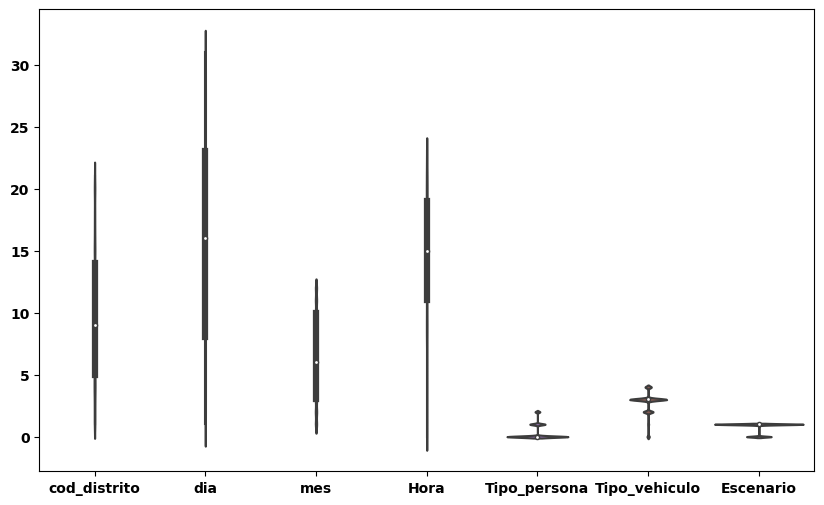

In [61]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(10,6))
sns.violinplot(data=df_cod_levisidad, orient='v')
plt.show()

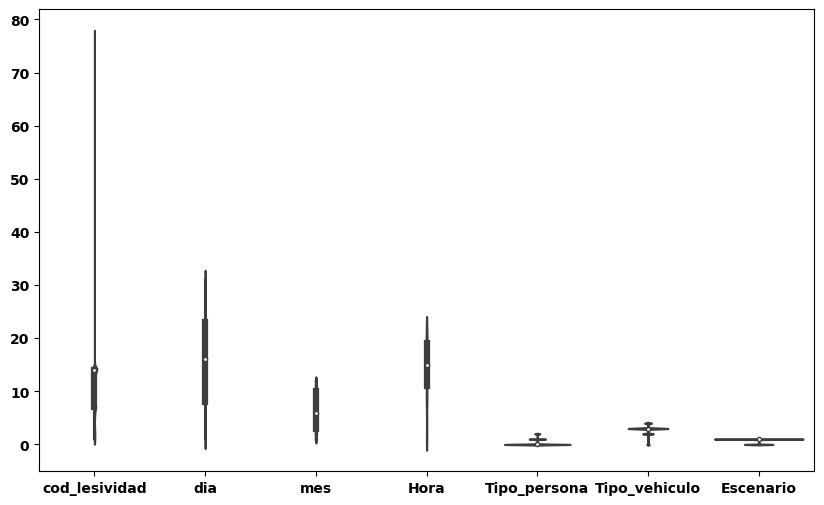

In [62]:
df_cod_distrito = df_accident_filt5.copy()
df_cod_distrito['Escenario'] = np.where(df_cod_distrito['cod_distrito']<df_cod_distrito['cod_distrito'].quantile(0.25),0,1)
df_cod_distrito.drop(['cod_distrito'],axis = 'columns', inplace = True)

plt.figure(figsize=(10,6))
sns.violinplot(data=df_cod_distrito, orient='v')
plt.show()

### **PASO1.** 


In [63]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_cod_levisidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_cod_levisidad['Escenario']

In [64]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-1.51773533, -1.33502057, -1.23002438, -0.95716266, -0.53544976,
        -0.95937752],
       [-1.51773533, -1.33502057, -1.23002438, -0.95716266, -0.53544976,
         0.26653206],
       [ 0.06768723, -1.6752768 , -1.50795064, -2.05051325, -0.53544976,
         0.26653206],
       ...,
       [ 0.77231948,  1.7272855 , -0.95209811, -0.22826226,  1.20092959,
         0.26653206],
       [ 0.24384529,  1.7272855 , -0.95209811,  1.22953853, -0.53544976,
        -0.95937752],
       [ 0.24384529,  1.7272855 , -0.95209811,  1.22953853, -0.53544976,
         0.26653206]])

In [65]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal


<class 'pandas.core.frame.DataFrame'>


,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo
0,-1.517735,-1.335021,-1.230024,-0.957163,-0.53545,-0.959378
1,-1.517735,-1.335021,-1.230024,-0.957163,-0.53545,0.266532
2,0.067687,-1.675277,-1.507951,-2.050513,-0.53545,0.266532
3,0.243845,-1.675277,-1.507951,-1.139388,-0.53545,0.266532
4,0.243845,-1.675277,-1.507951,-1.139388,-0.53545,0.266532
...,...,...,...,...,...,...
99560,0.772319,1.727285,-0.952098,-0.228262,1.20093,0.266532
99561,0.772319,1.727285,-0.952098,-0.228262,1.20093,0.266532
99562,0.772319,1.727285,-0.952098,-0.228262,1.20093,0.266532
99563,0.243845,1.727285,-0.952098,1.229539,-0.53545,-0.959378


In [66]:
X_normal.describe().round(4)

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo
count,99565.0000,99565.0000,99565.0000,99565.0000,99565.0000,99565.0000
mean,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.5177,-1.6753,-1.5080,-2.5972,-0.5354,-3.4112
25%,-0.8131,-0.8813,-0.9521,-0.5927,-0.5354,0.2665
50%,-0.1085,0.0260,-0.1183,0.1362,-0.5354,0.2665
75%,0.7723,0.8199,0.9934,0.8651,-0.5354,0.2665
max,2.0054,1.7273,1.5492,1.5940,2.9373,1.4924


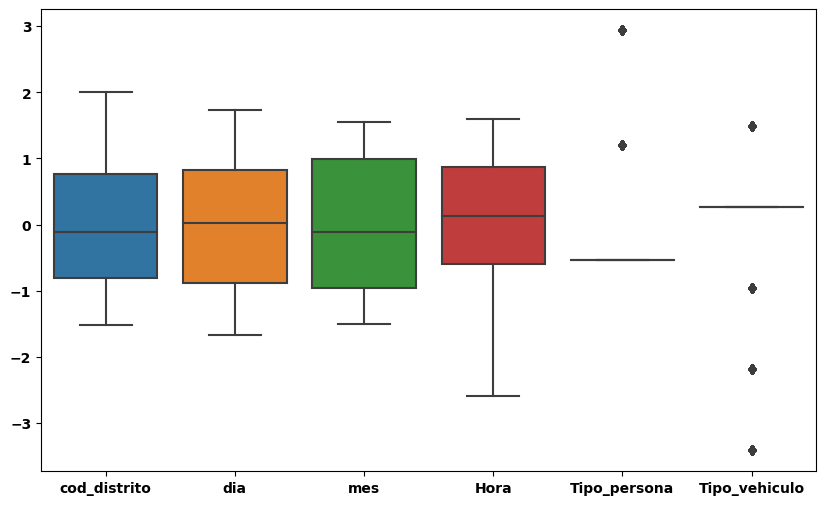

In [67]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(10,6))
sns.boxplot(data=X_normal, orient='v')
plt.show()

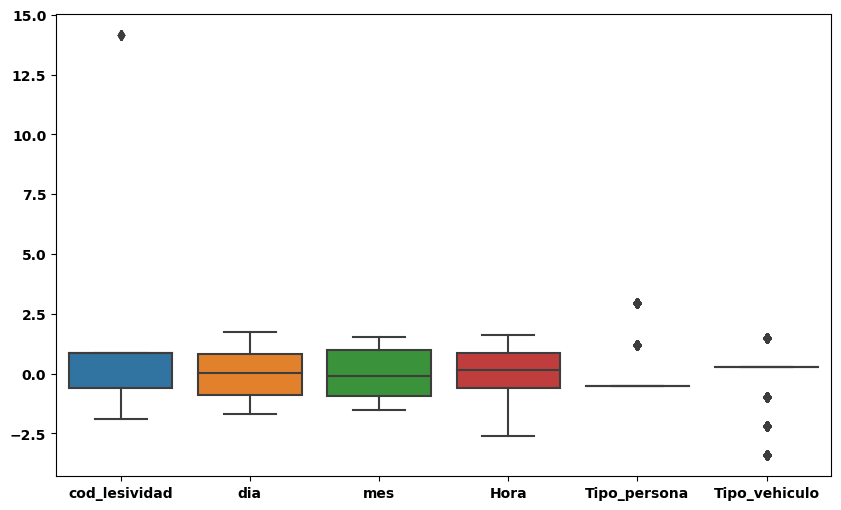

In [68]:
X1 = df_cod_distrito.drop('Escenario', axis='columns')

y1 = df_cod_distrito['Escenario']

from sklearn.preprocessing import StandardScaler
escalado1 = StandardScaler().fit(X1)
dataset_normal1 = escalado1.transform(X1)

X_normal1 = pd.DataFrame(dataset_normal1, columns=X1.columns)

plt.figure(figsize=(10,6))
sns.boxplot(data=X_normal1, orient='v')
plt.show()

## El clasificador

### **Paso 1.**  Dividir el dataset en Training y Test

In [69]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=1000)


In [70]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

79652
19913


99565

In [71]:
# la segunda escencia (dia)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normal1, y1, test_size=0.2, random_state=1000)

print(X_train1.shape[0])
print(X_test1.shape[0])
X_train1.shape[0] + X_test1.shape[0]


79652
19913


99565

### **Paso 2.** Cargar y elegir el modelo de regresión logística


In [72]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

In [73]:
# lo mismo prara la segunda  escogido(cod_distrito)
from sklearn.linear_model import LogisticRegression
log_r1 = LogisticRegression(max_iter=1000,
                            random_state=100)


### **``Paso 3``**. Entrenar el modelo de regresión logística con los datos de entrenamiento

In [74]:
# Entrenar el modelo
log_r.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=100)

In [75]:
# LA SEGUNDA 
log_r1.fit(X_train1,y_train1)

LogisticRegression(max_iter=1000, random_state=100)

### **``Paso 5.``** Obetener las predicciones

In [76]:
# Calcular las predicciones con el conjunto de datos de prueba
y_pred = log_r.predict(X_test)

# Imprimir la salida del modelo(la lesividad)
print(y_pred) 

[0 1 1 ... 1 1 1]


In [77]:
# Calcular las predicciones con el conjunto de datos de prueba
y_pred1 = log_r1.predict(X_test1)

# Imprimir la salida del modelo(la lesividad)
print(y_pred1)

[1 1 1 ... 1 1 1]


### **Paso 6.** Evalución del modelo a través de sus métricas

In [78]:
from sklearn.metrics import accuracy_score
# CALCULAR EL PORCENTAJE DE CASOS QUE EL MODELO HA ACERTADO
accuracy_score(y_test, y_pred)

0.7788379450610154

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.46      0.11      0.18      4321
           1       0.80      0.96      0.87     15592

    accuracy                           0.78     19913
   macro avg       0.63      0.54      0.52     19913
weighted avg       0.72      0.78      0.72     19913



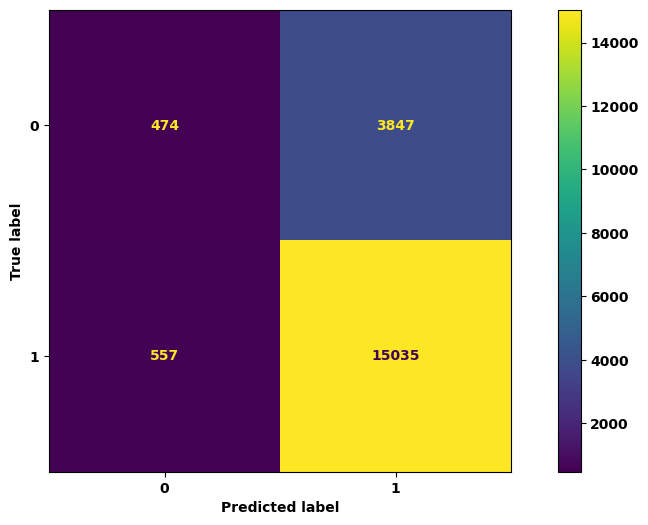

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                display_labels=log_r.classes_)
disp.plot()

plt.show()

In [81]:
# Calcular el área bajo la curva de funcionamiento del receptor 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5369866907578095

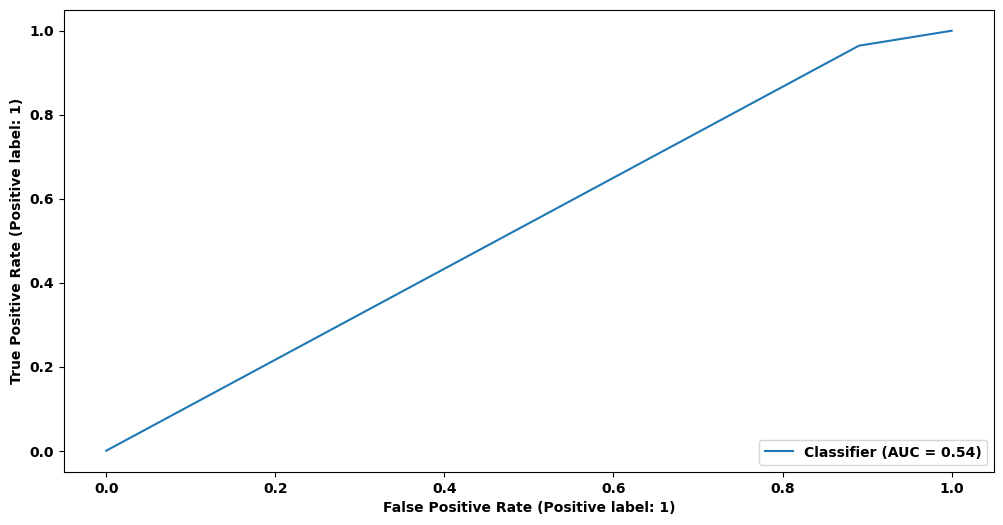

In [82]:
# Graficar la curva ROC( Receiver Operating Characteristic)
# AUC (Area Under the Curve)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,y_pred)
plt.show()

accuracy_score 0.7565911715964445
classification_report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4847
           1       0.76      1.00      0.86     15066

    accuracy                           0.76     19913
   macro avg       0.38      0.50      0.43     19913
weighted avg       0.57      0.76      0.65     19913



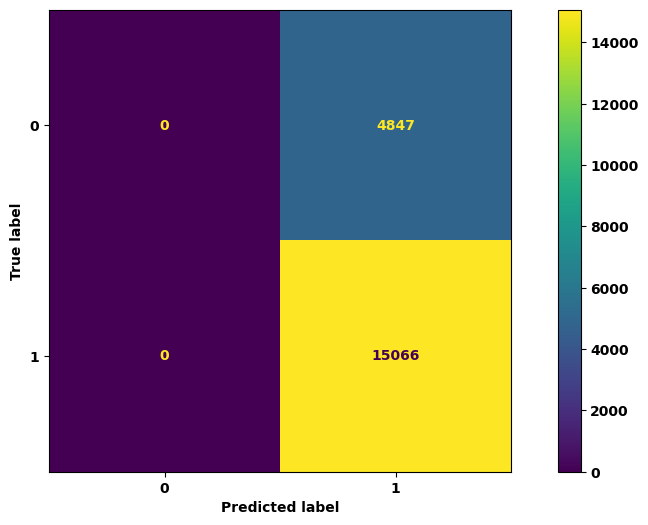

roc_auc_score 0.5


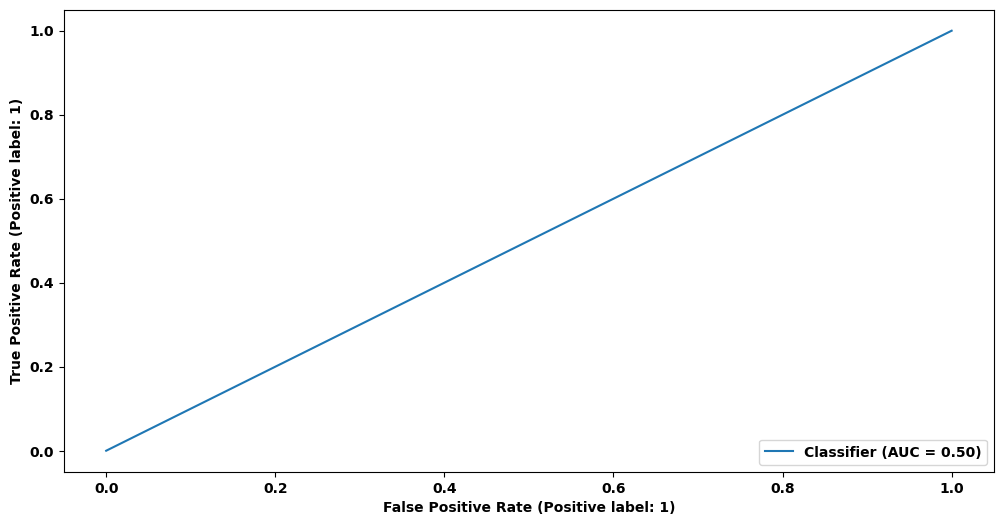

In [83]:
# la segunda escenario (cod_distrito)

from sklearn.metrics import accuracy_score
# CALCULAR EL PORCENTAJE DE CASOS QUE EL MODELO HA ACERTADO
print('accuracy_score',accuracy_score(y_test1, y_pred1))

from sklearn.metrics import classification_report

print('classification_report\n',classification_report(y_test1, y_pred1,zero_division=0))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test1, y_pred1),
                                display_labels=log_r1.classes_)
disp1.plot()

plt.show()

# Calcular el área bajo la curva de funcionamiento del receptor 
from sklearn.metrics import roc_auc_score
print('roc_auc_score',roc_auc_score(y_test1, y_pred1))
# Graficar la curva ROC( Receiver Operating Characteristic)
# AUC (Area Under the Curve)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test1,y_pred1)
plt.show()

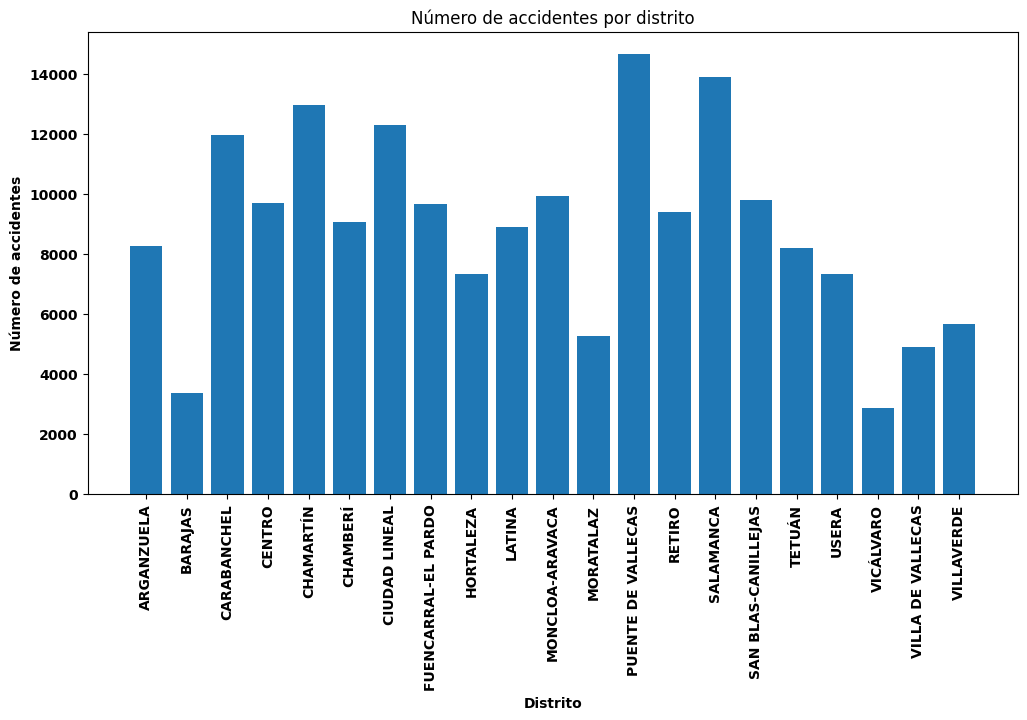

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')

# Gráfico de barras del número de accidentes por distrito
accidentes_por_distrito = datos['distrito'].value_counts().sort_index()
plt.bar(accidentes_por_distrito.index, accidentes_por_distrito.values)
plt.xticks(rotation=90)
plt.title('Número de accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.show()



/var/folders/k8/vpzcp5451nndsqlf76npqpcw0000gn/T/ipykernel_57704/2383144540.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_accidentes['dia_semana'] = pd.to_datetime(datos['fecha']).dt.day_name()


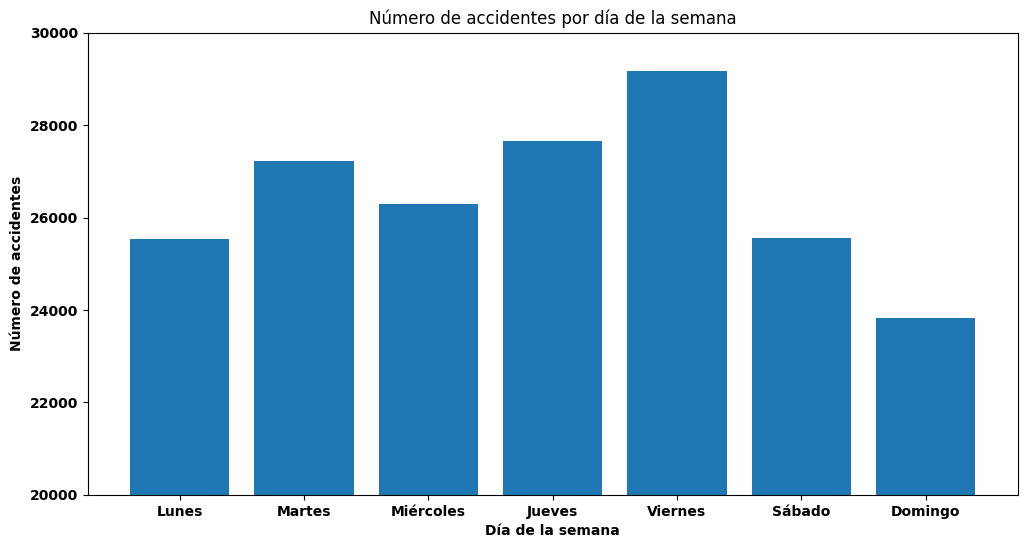

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')

# Crear una nueva columna con el día de la semana
df_accidentes['dia_semana'] = pd.to_datetime(datos['fecha']).dt.day_name()

# Contar el número de accidentes por día de la semana
accidentes_por_dia = df_accidentes['dia_semana'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#Cambiar nombre de los dias de la semana
accidentes_por_dia.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Gráfico de barras del número de accidentes por día de la semana
plt.bar(accidentes_por_dia.index, accidentes_por_dia.values)
plt.title('Número de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
# Ajustar el gráfico desde 20000 hasta 30000
plt.ylim(20000, 30000)
plt.show()


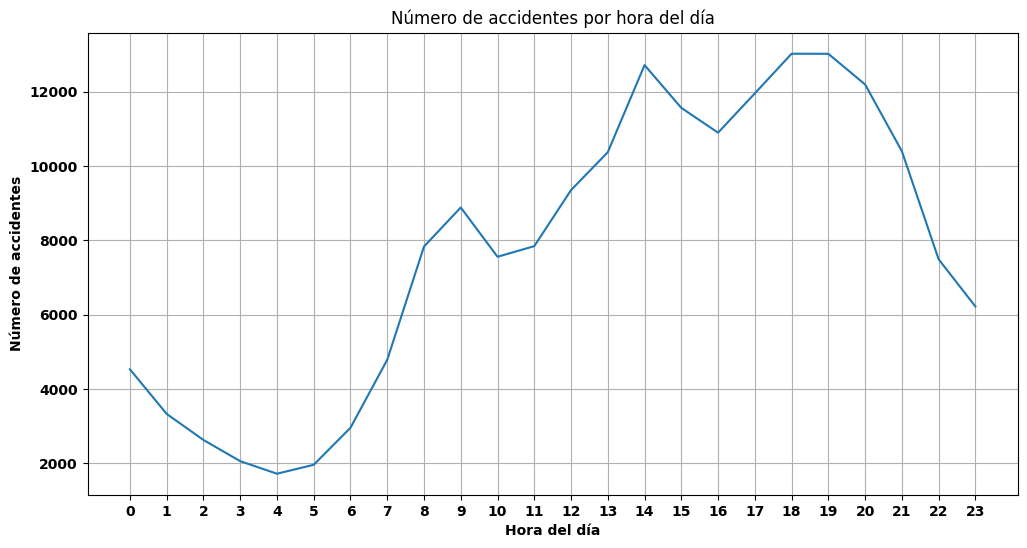

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')

# Obtener la columna de la hora del accidente
datos['hora'] = pd.to_datetime(datos['hora']).dt.hour

# Contar el número de accidentes por hora del día
accidentes_por_hora = datos['hora'].value_counts().sort_index()

# Gráfico de línea del número de accidentes por hora del día
plt.plot(accidentes_por_hora.index, accidentes_por_hora.values)
plt.title('Número de accidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


/var/folders/k8/vpzcp5451nndsqlf76npqpcw0000gn/T/ipykernel_57704/1475837229.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos['año'] = pd.to_datetime(datos['fecha']).dt.year


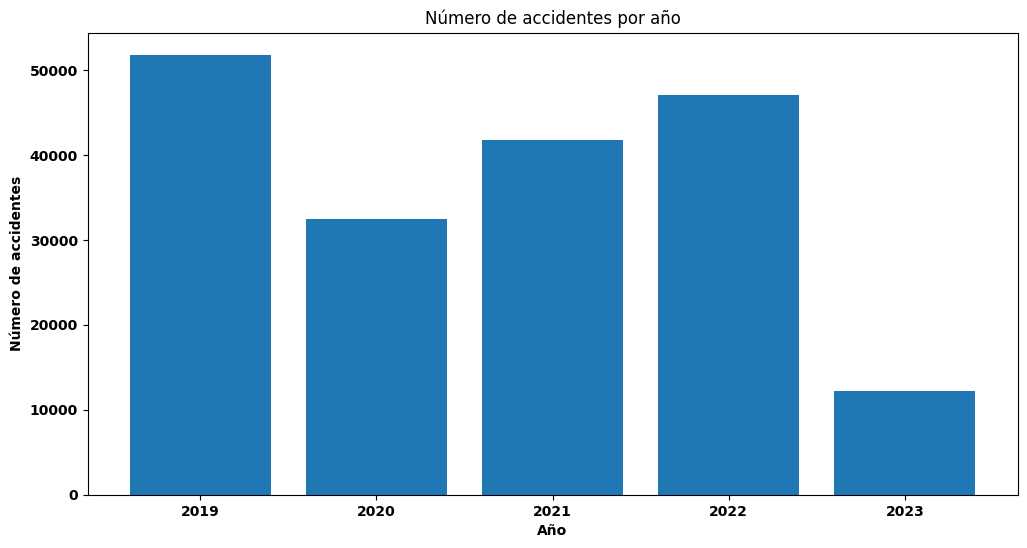

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')

# Obtener el año de la fecha del accidente
datos['año'] = pd.to_datetime(datos['fecha']).dt.year

# Contar el número de accidentes por año
accidentes_por_año = datos['año'].value_counts().sort_index()

# Gráfico de barras del número de accidentes por año
plt.bar(accidentes_por_año.index, accidentes_por_año.values)
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.xticks(accidentes_por_año.index)
plt.show()


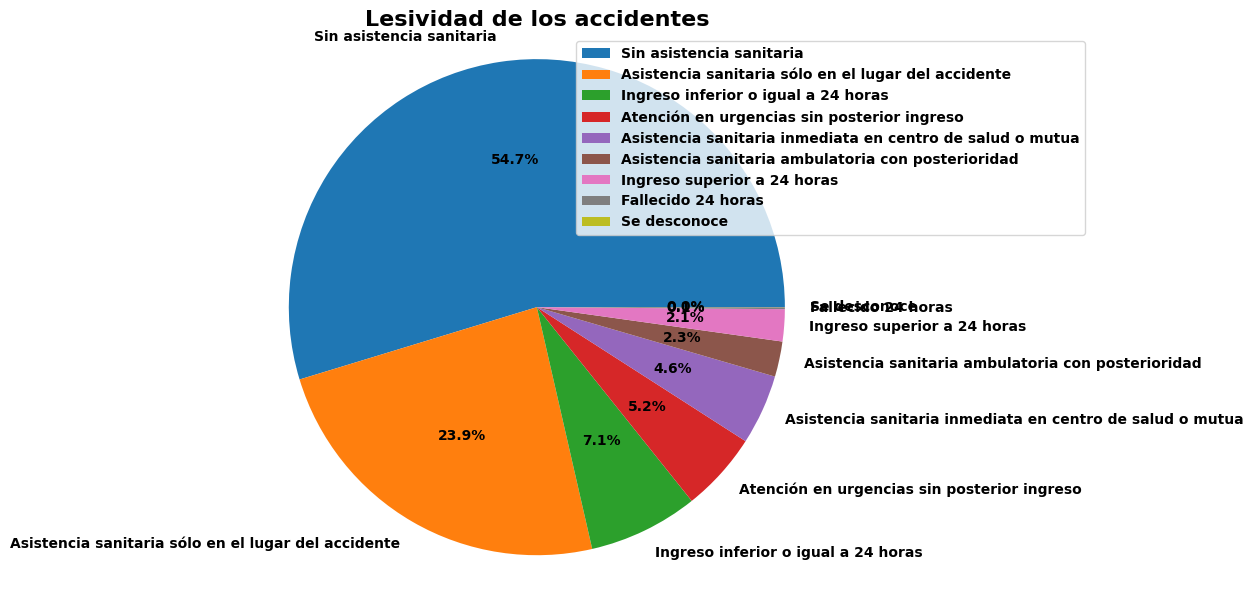

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')
# Contar el número de accidentes por lesividad
accidentes_por_lesividad = datos['lesividad'].value_counts()

# Gráfico de sectores del número de accidentes por lesividad
plt.pie(accidentes_por_lesividad.values, labels=accidentes_por_lesividad.index, autopct='%1.1f%%')
plt.title('Lesividad de los accidentes', fontsize=16, fontweight='bold')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()  # Ajusta el espacio entre el gráfico y el título
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))  # Mueve la leyenda a la derecha del gráfico
plt.tick_params(labelsize=14)  # Ajusta el tamaño de las etiquetas del gráfico
# Elimnar los sectores que representan menos del 2% del total
plt.setp(plt.gca().patches, linewidth=0.0)

plt.show()


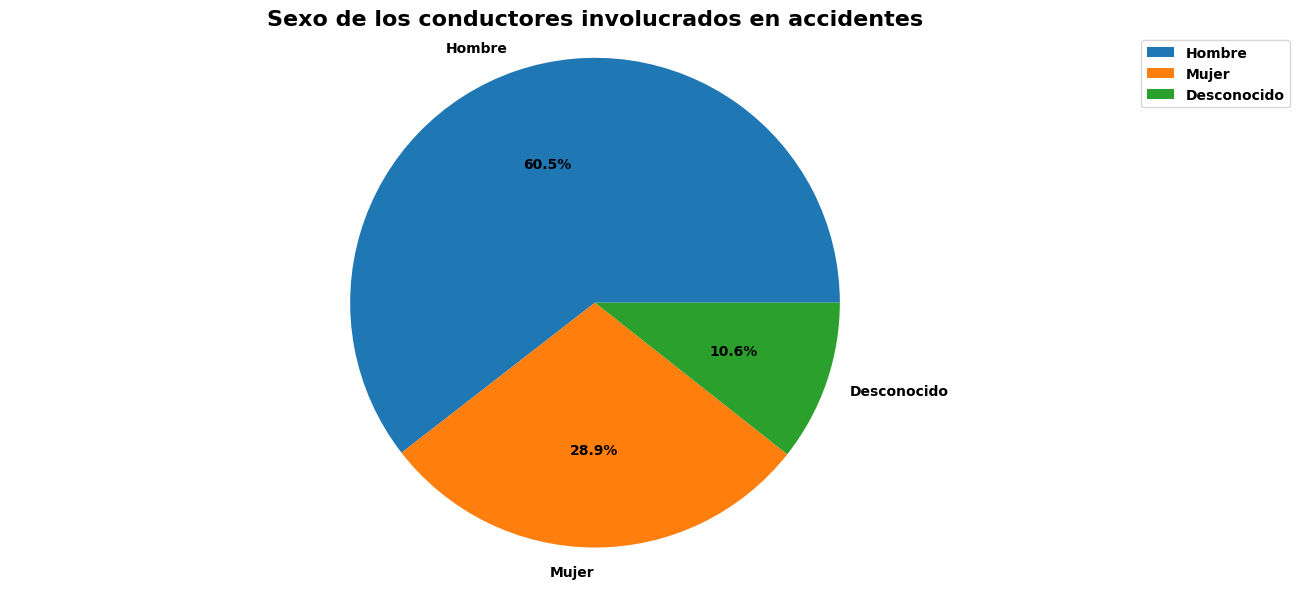

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')
# Contar el número de accidentes por sexo
accidentes_por_sexo = datos['sexo'].value_counts()

# Gráfico de sectores del número de accidentes por sexo
plt.pie(accidentes_por_sexo.values, labels=accidentes_por_sexo.index, autopct='%1.1f%%')
plt.title('Sexo de los conductores involucrados en accidentes', fontsize=16, fontweight='bold')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()  # Ajusta el espacio entre el gráfico y el título
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))  # Mueve la leyenda a la derecha del gráfico
plt.tick_params(labelsize=14)  # Ajusta el tamaño de las etiquetas del gráfico
plt.show()


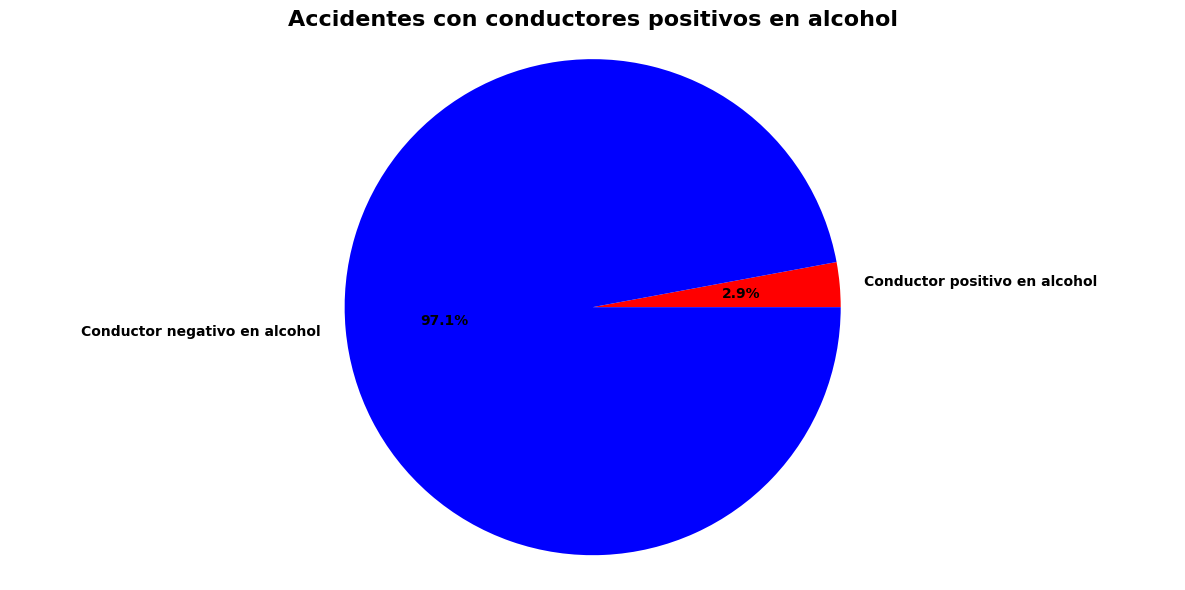

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')
# Contar el número de accidentes con conductor positivo en alcohol
accidentes_alcohol = datos['positiva_alcohol'].value_counts()
positivos = accidentes_alcohol['S']
negativos = accidentes_alcohol['N']

# Gráfico de sectores del número de accidentes por positivo en alcohol
plt.pie([positivos, negativos], labels=['Conductor positivo en alcohol', 'Conductor negativo en alcohol'],
        autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Accidentes con conductores positivos en alcohol', fontsize=16, fontweight='bold')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()  # Ajusta el espacio entre el gráfico y el título
plt.tick_params(labelsize=14)  # Ajusta el tamaño de las etiquetas del gráfico
plt.show()


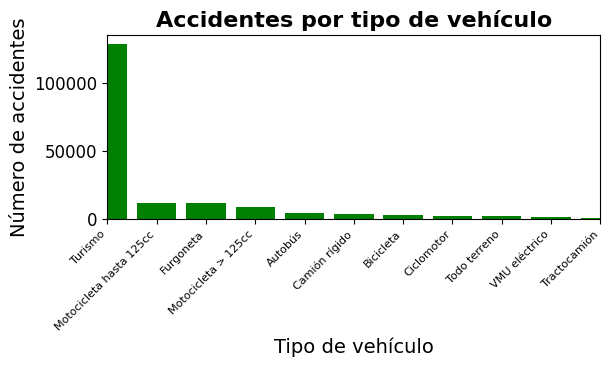

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')
# Crear un histograma del número de accidentes por tipo de vehículo
vehiculos = datos['tipo_vehiculo'].value_counts()
plt.bar(vehiculos.index, vehiculos.values, color='green')
plt.title('Accidentes por tipo de vehículo', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de vehículo', fontsize=14)
plt.ylabel('Número de accidentes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tick_params(labelsize=12)
plt.tight_layout()
#solo los 10 primeros
plt.xlim(0, 10)
# texto eje x más pequeño
plt.tick_params(axis='x', labelsize=8)
plt.show()
